# Sign Language Recognition
It uses deep learnig model 

In [34]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [35]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import itertools
import os
import matplotlib.pyplot as plt
%matplotlib inline

### Get path

In [36]:
train_path='C:/Users/abhin/sign lang proj/images/test'
test_path='C:/Users/abhin/sign lang proj/images/train'

#### Size of image

In [37]:
sze=128  #size of image (128*128)

### Take images in form of batches from data Generator

In [38]:
train_datagen= ImageDataGenerator( rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_batches = train_datagen.flow_from_directory(directory=train_path,
                                               batch_size=10, # number of images to process at a time 
                                               target_size=(sze, sze), # convert all images to be 128 x 128
                                               class_mode="categorical", #classification problem (27 classes)
                                               color_mode="grayscale")
test_batches = test_datagen.flow_from_directory(directory=test_path,
                                                batch_size=10,
                                                target_size=(sze,sze),
                                                class_mode="categorical",
                                                color_mode="grayscale")  

Found 4268 images belonging to 27 classes.
Found 12845 images belonging to 27 classes.


### Plot some images

In [39]:
imgs, labels = next(train_batches)

In [40]:
# plots images with labels within jupyter notebook
def plotImages(images_arr):
    fig,axes=plt.subplots(1,10,figsize=(20,20))
    axes=axes.flatten()
    for img, ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

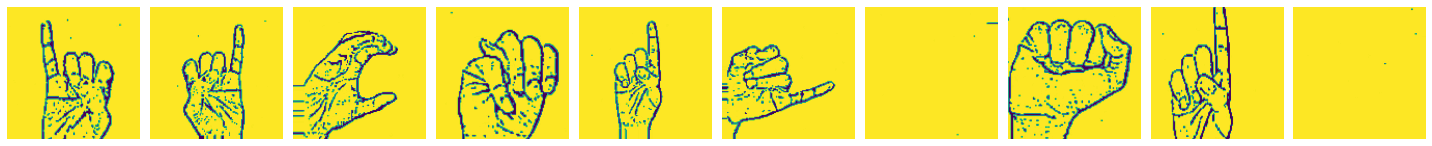

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]]


In [41]:
plotImages(imgs)
print(labels)

### Build the sequential model

In [42]:
model=Sequential([
                  Conv2D(filters=27,kernel_size=(3,3),activation='relu',padding='same',input_shape=(sze,sze,1)),
                  Conv2D(filters=54,kernel_size=(3,3),activation='relu',padding='same'),
                  MaxPool2D(pool_size=(2,2)),
                  Conv2D(filters=54,kernel_size=(3,3),activation='relu',padding='same'),
                  MaxPool2D(pool_size=(2,2)),
                  Conv2D(filters=108,kernel_size=(3,3),activation='relu',padding='same'),
                  MaxPool2D(pool_size=(2,2)),
                  Conv2D(filters=108,kernel_size=(3,3),activation='relu',padding='same'),
                  Conv2D(filters=216,kernel_size=(3,3),activation='relu',padding='same'),  
                  MaxPool2D(pool_size=(2,2)),
                  Conv2D(filters=108,kernel_size=(3,3),activation='relu',padding='same'),
                  Dropout(0.25),
                  Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
                  Dropout(0.25),
                  Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
                  Dropout(0.25),
                  Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
                  Flatten(),
                  Dense(units=96,activation='relu'),
                  Dropout(0.25),    
                  Dense(units=64,activation='relu'),   
                  Dense(units=64,activation='relu'),
                  Dense(units=54,activation='relu'),  
                  Dense(units=27,activation='softmax')              
])

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 128, 128, 27)      270       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 128, 128, 54)      13176     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 54)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 64, 64, 54)        26298     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 54)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 32, 32, 108)       52596     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 108)      

### Train the model

In [45]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [46]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [47]:
model.fit(x=train_batches,validation_data=test_batches,epochs=20,callbacks=EarlyStopping(monitor='val_loss', mode='min', verbose=4, patience=50),verbose=2)

Epoch 1/20
427/427 - 229s - loss: 3.2940 - accuracy: 0.0349 - val_loss: 3.2706 - val_accuracy: 0.0477
Epoch 2/20
427/427 - 230s - loss: 2.7543 - accuracy: 0.1795 - val_loss: 2.0033 - val_accuracy: 0.4313
Epoch 3/20
427/427 - 227s - loss: 1.8313 - accuracy: 0.4346 - val_loss: 0.9284 - val_accuracy: 0.7219
Epoch 4/20
427/427 - 225s - loss: 1.1605 - accuracy: 0.6162 - val_loss: 0.5588 - val_accuracy: 0.8363
Epoch 5/20
427/427 - 227s - loss: 0.8638 - accuracy: 0.7062 - val_loss: 0.3201 - val_accuracy: 0.9065
Epoch 6/20
427/427 - 242s - loss: 0.6801 - accuracy: 0.7643 - val_loss: 0.2253 - val_accuracy: 0.9278
Epoch 7/20
427/427 - 304s - loss: 0.5611 - accuracy: 0.8104 - val_loss: 0.1883 - val_accuracy: 0.9358
Epoch 8/20
427/427 - 315s - loss: 0.4680 - accuracy: 0.8397 - val_loss: 0.1135 - val_accuracy: 0.9674
Epoch 9/20
427/427 - 298s - loss: 0.3829 - accuracy: 0.8653 - val_loss: 0.0805 - val_accuracy: 0.9735
Epoch 10/20
427/427 - 277s - loss: 0.3130 - accuracy: 0.9004 - val_loss: 0.0824 - 

### Save the model

In [48]:
#checks first to see if file exists already
#if not, the model is saved 
import os.path
if(os.path.isfile('C:/Users/abhin/sign lang proj/sign_lang_recog_train_model.h5')) is False:
filepath='C:/Users/abhin/sign lang proj/sign_lang_recog_train_model.h5'
model.save(filepath)

### Use the saved model

In [15]:
from tensorflow.keras.models import load_model
new_model=load_model('C:/Users/abhin/sign lang proj/sign_lang_recog_train_model.h5')

In [16]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4194432   
_________________________________________________________________
dense_1 (Dense)              (None, 96)                1

### model.to_json
save the architecture of a model, and not its weights or its training configuration

In [17]:
#save as json
json_string=model.to_json()

In [18]:
# model reconstruction from JSON:
from keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [19]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 32)        18464     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

### model.save_weights
save the weights of a model

In [20]:
 #checks first to see if file exists already
#if not, the model is saved 
import os.path
if(os.path.isfile(('my_model_weights.h5')) is False:
    model.save_weights('my_model_weights.h5')

SyntaxError: invalid syntax (<ipython-input-20-4af35b769206>, line 4)